# How to classify IRIS Data with a plain perceptron

## Goal
- Play with the historical linear classifier
- Predict the size of the leaves of the IRIS dataset


## Import useful libraries

In [2]:
import os
import sys

import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix

import matplotlib.pyplot as plt
import matplotlib

import seaborn as sns

# Specific sci-kit learn packages
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score


## Open and read the data

IRIS dataset i a very well known dataset from the Machine Learning community. 
This is kind of obligatory step to meet this dataset once in your life. 

So, let's do it if not yet done !

- Retrieve a dataset : http://scikit-learn.org/stable/modules/classes.html#module-sklearn.datasetsAbout 
- the datesets : http://scikit-learn.org/stable/datasets/index.html  

### Data fields (X):
- 0 : sepal length in cm
- 1 : sepal width in cm
- 2 : petal length in cm
- 3 : petal width in cm  

### Label/Class (y):
- Class 0: Iris-Setosa, 
- Class 1: Iris-Versicolour
- Class 2: Iris-Virginica



<img src="./IRIS_Dataset.jpg" witdh="20%">

### We just want to know if a flower is an Iris Setosa or not just using the size of the petals

In [3]:
x0, y0 = load_iris(return_X_y=True)

x = x0[:, (2,3)] # We only keep fields 2 and 3 (length and width of the petals)
y = y0.copy()    # To get the label

In [4]:
# Create condition for a classification
y[ y0==0 ] = 1       # 1 = Iris setosa
y[ y0>=1 ] = 0       # 0 = not iris setosa

df=pd.DataFrame.from_dict({'Length (x1)':x[:,0], 'Width (x2)':x[:,1], 'Setosa {0,1} (y)':y})
display(df.head())

,Length (x1),Width (x2),"Setosa {0,1} (y)"
0,1.4,0.2,1
1,1.4,0.2,1
2,1.3,0.2,1
3,1.5,0.2,1
4,1.4,0.2,1


In [5]:
print(f'x shape : {x.shape}')
print(f'y shape : {y.shape}')

x shape : (150, 2)
y shape : (150,)


In [6]:
df.describe()

,Length (x1),Width (x2),"Setosa {0,1} (y)"
count,150.000000,150.000000,150.000000
mean,3.758000,1.199333,0.333333
std,1.765298,0.762238,0.472984
min,1.000000,0.100000,0.000000
25%,1.600000,0.300000,0.000000
50%,4.350000,1.300000,0.000000
75%,5.100000,1.800000,1.000000
max,6.900000,2.500000,1.000000


In [7]:
def shuffle_np_dataset(x, y):
    """
    Shuffle a dataset (x,y)
    INPUT: x,y : dataset
    return:
        x,y mixed
    """
    assert (len(x) == len(y)), "x and y must have same size"
    p = np.random.permutation(len(x))
    return x[p], y[p]

In [8]:
x,y = shuffle_np_dataset(x, y)
    
n=int(len(x)*0.8)
x_train = x[:n]
y_train = y[:n]
x_test  = x[n:]
y_test  = y[n:]

print(f'x_train shape : {x_train.shape}')
print(f'y_train shape : {y_train.shape}')
print(f'x_test shape  : {x_test.shape}')
print(f'y_test shape  : {y_test.shape}')

x_train shape : (120, 2)
y_train shape : (120,)
x_test shape  : (30, 2)
y_test shape  : (30,)


## Generate our Perceptron

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html?highlight=perceptron#sklearn.linear_model.Perceptron

- **max_iterint**, default=1000 - The maximum number of passes over the training data (aka epochs)
- **tol** : the iterations will stop when (loss > previous_loss - tol).
- **random_state**: int, RandomState instance, default=None - Used to shuffle the training data, when shuffle is set to True. Pass an int for reproducible output across multiple function calls.

In [10]:
percept = Perceptron(max_iter=50, random_state=42, 
                 tol=0.01, verbose=1)
percept.fit(x_train, y_train)

-- Epoch 1
Norm: 1.26, NNZs: 2, Bias: 2.000000, T: 120, Avg. loss: 0.135583
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 1.26, NNZs: 2, Bias: 2.000000, T: 240, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 1.26, NNZs: 2, Bias: 2.000000, T: 360, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 1.26, NNZs: 2, Bias: 2.000000, T: 480, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 1.26, NNZs: 2, Bias: 2.000000, T: 600, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 1.26, NNZs: 2, Bias: 2.000000, T: 720, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 1.26, NNZs: 2, Bias: 2.000000, T: 840, Avg. loss: 0.000000
Total training time: 0.00 seconds.
Convergence after 7 epochs took 0.00 seconds


Perceptron(max_iter=50, random_state=42, tol=0.01, verbose=1)

## Predictions 

In [11]:
y_pred = percept.predict(x_test) 

df=pd.DataFrame.from_dict({'Length (x1)':x_test[:,0], 'Width (x2)':x_test[:,1], 'y_test':y_test, 'y_pred':y_pred})
display(df[:15])

,Length (x1),Width (x2),y_test,y_pred
0,1.5,0.2,1,1
1,5.6,1.4,0,0
2,5.3,1.9,0,0
3,3.9,1.4,0,0
4,4.4,1.4,0,0
5,1.3,0.3,1,1
6,1.4,0.2,1,1
7,4.7,1.6,0,0
8,6.6,2.1,0,0
9,1.6,0.2,1,1


In [12]:
display(percept.coef_)
display(percept.intercept_)

array([[-0.4, -1.2]])

array([2.])

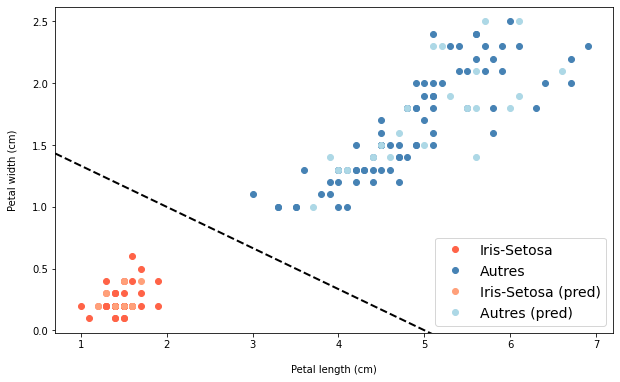

In [13]:
def plot_perceptron(x_train, y_train, x_test, y_test):
    
    # Get Coeffs of the fit
    a = -percept.coef_[0][0] / percept.coef_[0][1]
    b = -percept.intercept_ / percept.coef_[0][1]
    
    # Create a box for the plot  
    box=[x.min(axis=0)[0], x.max(axis=0)[0],
         x.min(axis=0)[1],x.max(axis=0)[1]]
    mx=(box[1]-box[0])/20
    my=(box[3]-box[2])/20
    box=[box[0]-mx,box[1]+mx,box[2]-my,box[3]+my]

    
    fig, axs = plt.subplots(1, 1)
    fig.set_size_inches(10,6)
    axs.plot(x_train[y_train==1, 0], x_train[y_train==1, 1], "o", color='tomato', label="Iris-Setosa")
    axs.plot(x_train[y_train==0, 0], x_train[y_train==0, 1], "o", color='steelblue',label="Autres")
    
    axs.plot(x_test[y_pred==1, 0],   x_test[y_pred==1, 1],   "o", color='lightsalmon', label="Iris-Setosa (pred)")
    axs.plot(x_test[y_pred==0, 0],   x_test[y_pred==0, 1],   "o", color='lightblue',   label="Autres (pred)")
    
    axs.plot([box[0], box[1]], [a*box[0]+b, a*box[1]+b], "k--", linewidth=2)
    
    axs.set_xlabel("Petal length (cm)", labelpad=15) #, fontsize=14)
    axs.set_ylabel("Petal width (cm)",  labelpad=15) #, fontsize=14)
    axs.legend(loc="lower right", fontsize=14)
    axs.set_xlim(box[0],box[1])
    axs.set_ylim(box[2],box[3])
    plt.show()
    
plot_perceptron(x_train,y_train, x_test,y_test)

In [14]:
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Accuracy: 1.00


### More reading about Perceptron
https://machinelearningmastery.com/perceptron-algorithm-for-classification-in-python/